In [160]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

  0%|          | 0.00/1.34M [00:01<?, ?B/s]


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
import os

In [ ]:
path = ""
path = os.path.join(path, "netflix_titles.csv")

data = pd.read_csv(path)

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
data["cast"].fillna("No Cast" , inplace = True)
data["country"].fillna("No Country" , inplace = True)
data["date_added"].fillna("1800-01-01" , inplace = True)
data["rating"].fillna("No Rating" , inplace = True)


In [ ]:
data["director"].head(50)

0                                       Kirsten Johnson
1                                                   NaN
2                                       Julien Leclercq
3                                                   NaN
4                                                   NaN
5                                         Mike Flanagan
6                         Robert Cullen, José Luis Ucha
7                                          Haile Gerima
8                                       Andy Devonshire
9                                        Theodore Melfi
10                                                  NaN
11                                    Kongkiat Komesiri
12                                  Christian Schwochow
13                                        Bruno Garotti
14                                                  NaN
15                                                  NaN
16        Pedro de Echave García, Pablo Azorín Williams
17                                              

In [ ]:
data["director"].fillna("No Director", inplace=True)
data["director"].head(20)

0                                   Kirsten Johnson
1                                       No Director
2                                   Julien Leclercq
3                                       No Director
4                                       No Director
5                                     Mike Flanagan
6                     Robert Cullen, José Luis Ucha
7                                      Haile Gerima
8                                   Andy Devonshire
9                                    Theodore Melfi
10                                      No Director
11                                Kongkiat Komesiri
12                              Christian Schwochow
13                                    Bruno Garotti
14                                      No Director
15                                      No Director
16    Pedro de Echave García, Pablo Azorín Williams
17                                      No Director
18                                       Adam Salky
19          

In [ ]:
data[data["duration"].isnull()][["show_id", "title", "country", "director", "date_added", "duration", "type"]]

,show_id,title,country,director,date_added,duration,type
5541,s5542,Louis C.K. 2017,United States,Louis C.K.,"April 4, 2017",NaN,Movie
5794,s5795,Louis C.K.: Hilarious,United States,Louis C.K.,"September 16, 2016",NaN,Movie
5813,s5814,Louis C.K.: Live at the Comedy Store,United States,Louis C.K.,"August 15, 2016",NaN,Movie


In [ ]:
data["date_added"] = pd.to_datetime(data["date_added"])

C:\Users\Panda\AppData\Local\Temp\ipykernel_28476\1202917360.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["date_added"] = pd.to_datetime(data["date_added"])


In [ ]:
data_series = pd.DataFrame()
data_series["duration"] = data[(data["type"] == "Movie") & 
                   (data["date_added"] >= "2016-01-01") & 
                   (data["date_added"] <= "2017-12-31") & 
                   (data["country"] == "United States")]["duration"].str.strip(" min")
data_series

,duration
5101,82
5107,91
5108,61
5110,80
5113,118
...,...
8734,78
8739,82
8763,45
8782,88


In [ ]:
data["duration (min)"] = data["duration"].str.extract(r'(\d+)(?=\s*min)').astype(float).fillna(0).astype(int)
data["duration (season)"] = data["duration"].str.extract(r'(\d+)(?=\s*Seasons)').astype(float).fillna(0).astype(int)

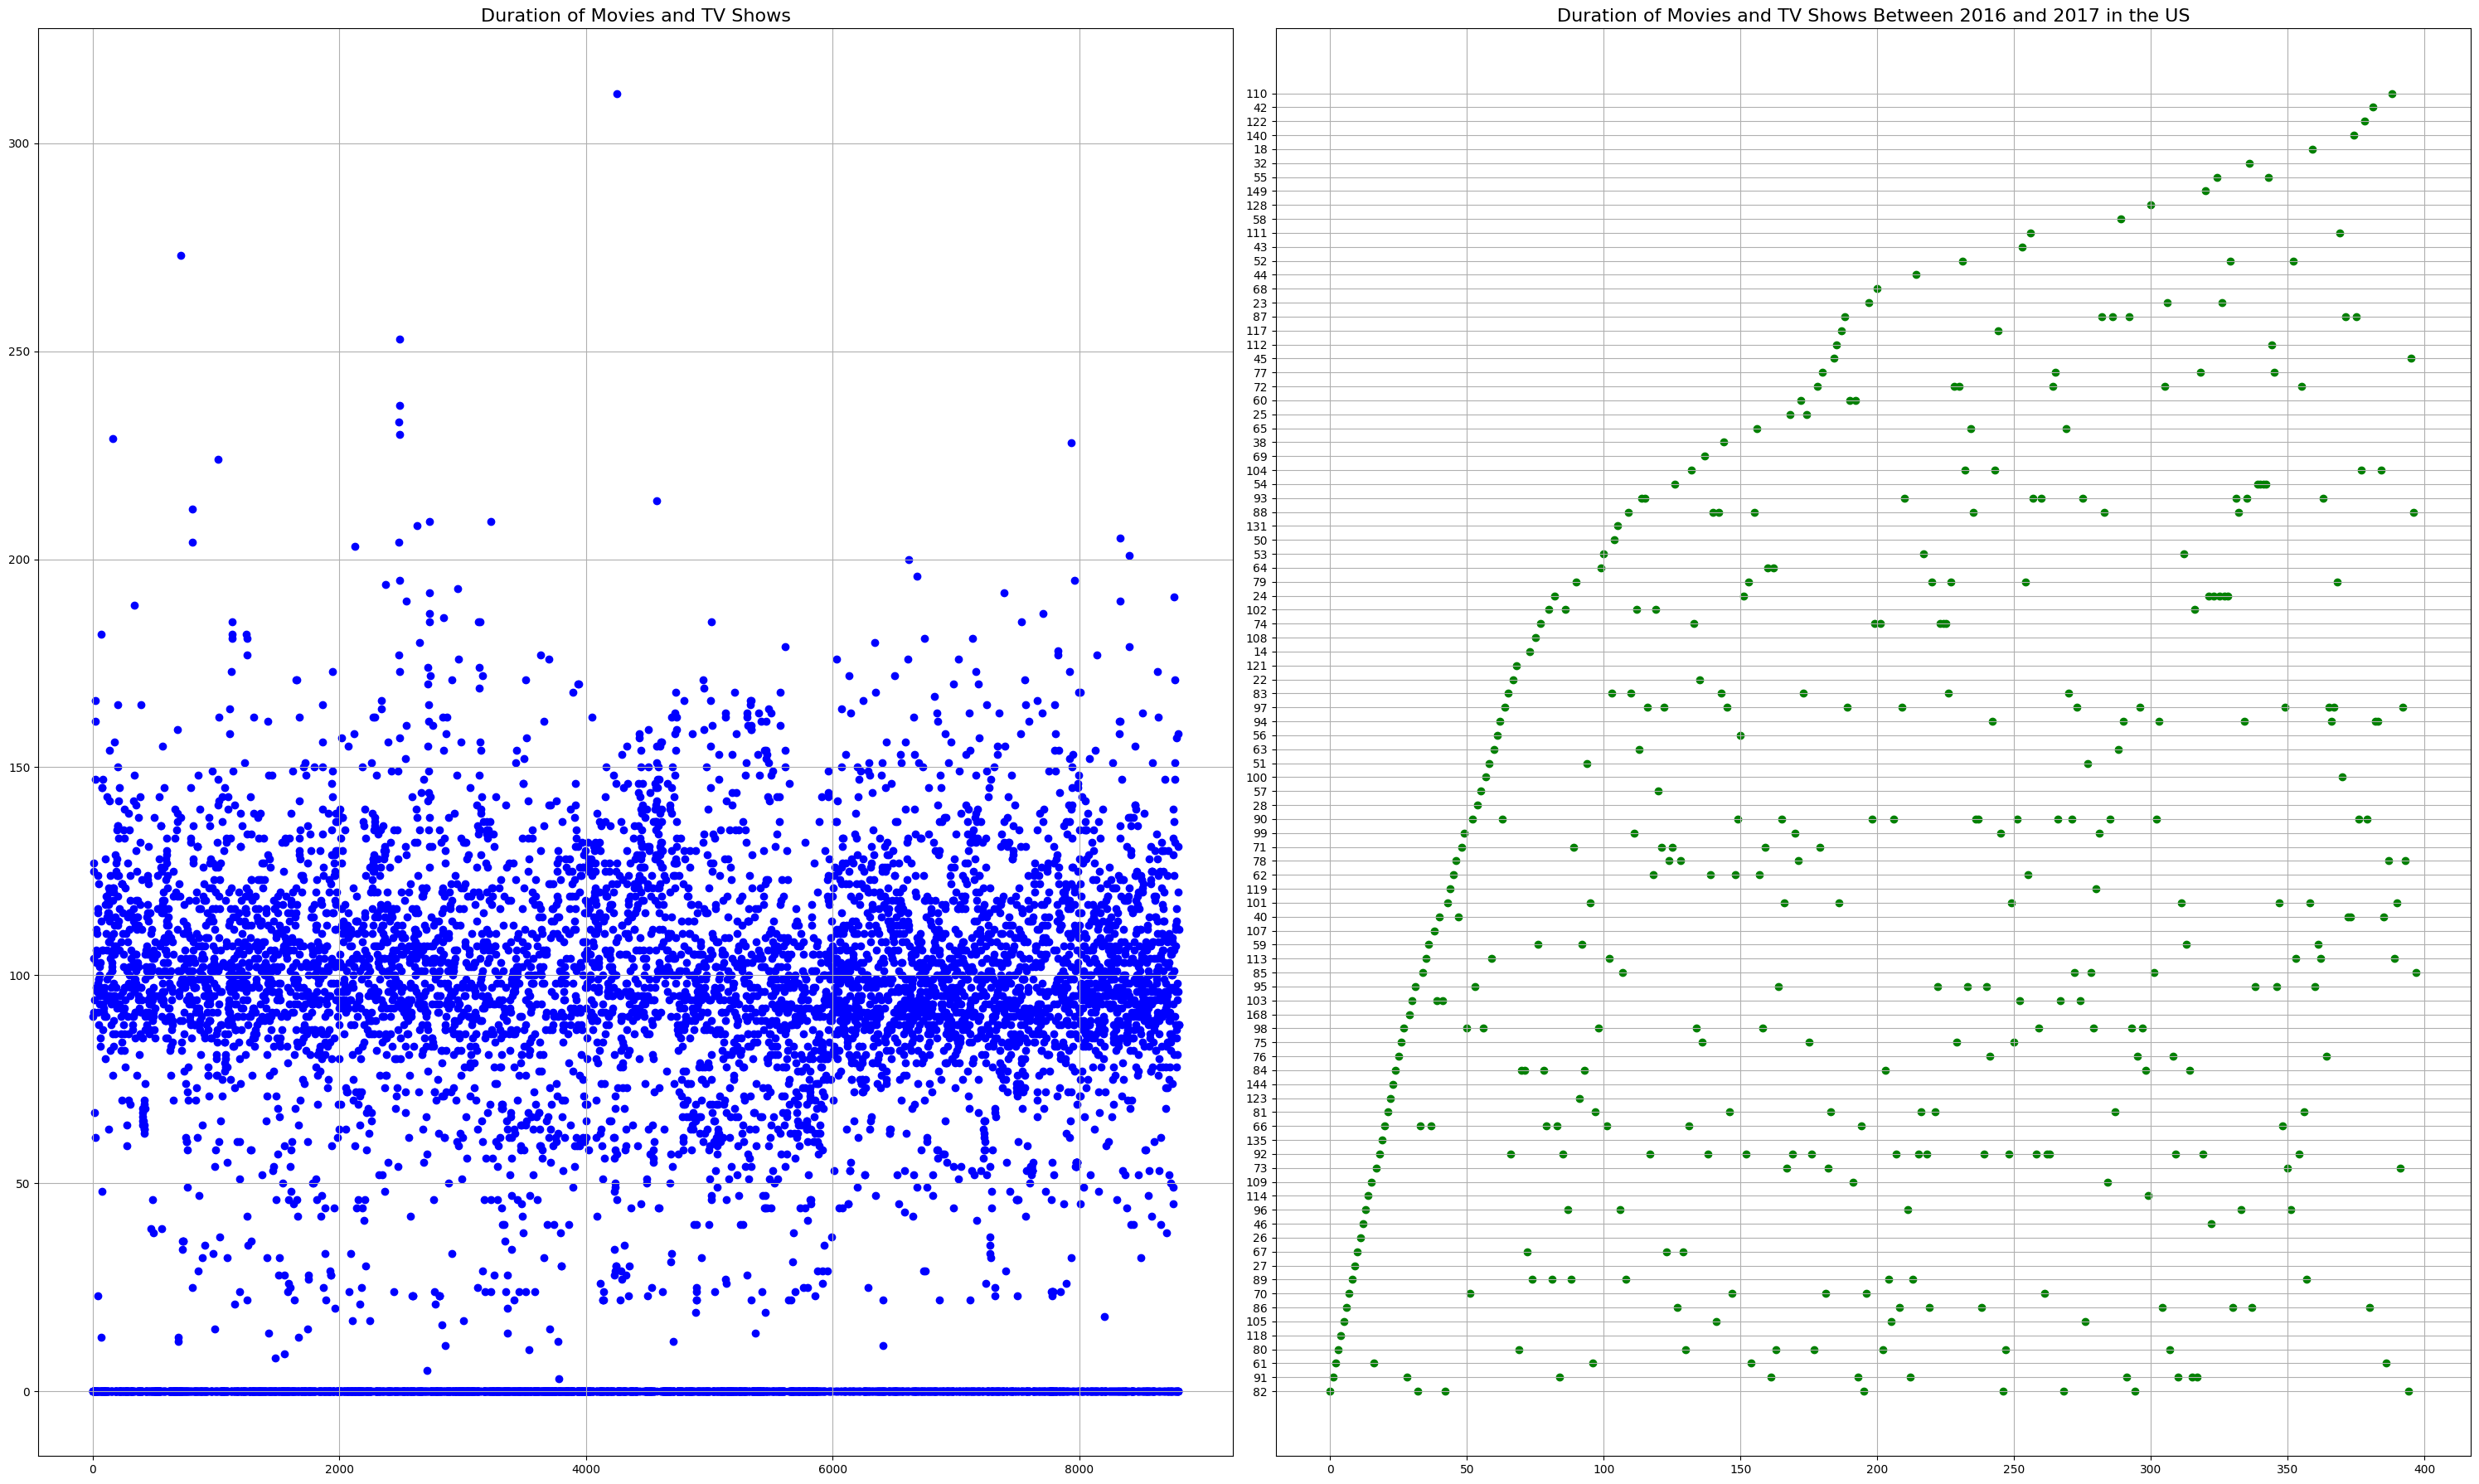

In [ ]:

figure, axes = plt.subplots(ncols=2, nrows=1, figsize=(30, 18))

axes[0].scatter(range(len(data["duration (min)"].dropna())), data["duration (min)"].dropna(), color='b')
axes[0].set_title("Duration of Movies and TV Shows", fontsize=16)
axes[0].grid(True)

axes[1].scatter(range(len(data_series["duration"].dropna())), data_series["duration"].dropna(), color='g')
axes[1].set_title("Duration of Movies and TV Shows Between 2016 and 2017 in the US", fontsize=16)
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
data[data["duration (min)"] == 0].value_counts()

show_id  type     title                                  director     cast                                                                                                                                                                                      country                        date_added  release_year  rating  duration   listed_in                                             description                                                                                                                                             duration (min)  duration (season)
s100     TV Show  On the Verge                           No Director  Julie Delpy, Elisabeth Shue, Sarah Jones, Alexia Landeau, Mathieu Demy, Troy Garity, Timm Sharp, Giovanni Ribisi                                                                          France, United States          2021-09-07  2021          TV-MA   1 Season   TV Comedies, TV Dramas                                Four women — a chef, a single mom, an heir

In [ ]:
newData = pd.Series(data.loc[data["duration (min)"] != 0, "duration (min)"].values)
result = newData.median()

In [ ]:
data["duration"].fillna(result, inplace=True)

In [ ]:
data.dtypes

show_id                      object
type                         object
title                        object
director                     object
cast                         object
country                      object
date_added           datetime64[ns]
release_year                  int64
rating                       object
duration                     object
listed_in                    object
description                  object
duration (min)                int32
duration (season)             int32
dtype: object

In [ ]:
data.shape

(8807, 14)

In [ ]:
castData = pd.DataFrame()
castData["show_id"] = data["show_id"]
castData["show_title"] = data["title"]
castData["number_of_cast_members"] = data["cast"].apply(lambda x: len(x.split(",")) if x != "No Cast" else 0)

In [ ]:
castData

,show_id,show_title,number_of_cast_members
0,s1,Dick Johnson Is Dead,0
1,s2,Blood & Water,19
2,s3,Ganglands,9
3,s4,Jailbirds New Orleans,0
4,s5,Kota Factory,8
...,...,...,...
8802,s8803,Zodiac,10
8803,s8804,Zombie Dumb,0
8804,s8805,Zombieland,7
8805,s8806,Zoom,9


In [ ]:
data["number_of_cast_members"] = castData["number_of_cast_members"]

In [ ]:
pd.concat([data, castData], axis=1, join="inner")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration (min),duration (season),number_of_cast_members,show_id,show_title,number_of_cast_members
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,0,0,s1,Dick Johnson Is Dead,0
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0,2,19,s2,Blood & Water,19
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0,0,9,s3,Ganglands,9
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,No Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0,0,0,s4,Jailbirds New Orleans,0
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0,2,8,s5,Kota Factory,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158,0,10,s8803,Zodiac,10
8803,s8804,TV Show,Zombie Dumb,No Director,No Cast,No Country,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",0,2,0,s8804,Zombie Dumb,0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88,0,7,s8805,Zombieland,7
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88,0,9,s8806,Zoom,9


In [ ]:
data["type"] = data.apply(lambda x: "movie" if x["duration (min)"] > 0 else "series", axis=1) 

In [ ]:
dummies = pd.get_dummies(data["type"])
pd.concat([data, dummies], axis=1, join="inner")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration (min),duration (season),number_of_cast_members,movie,series
0,s1,movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,0,0,True,False
1,s2,series,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0,2,19,False,True
2,s3,series,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0,0,9,False,True
3,s4,series,Jailbirds New Orleans,No Director,No Cast,No Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0,0,0,False,True
4,s5,series,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0,2,8,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158,0,10,True,False
8803,s8804,series,Zombie Dumb,No Director,No Cast,No Country,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",0,2,0,False,True
8804,s8805,movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88,0,7,True,False
8805,s8806,movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88,0,9,True,False


In [ ]:
data.dtypes

show_id                           object
type                              object
title                             object
director                          object
cast                              object
country                           object
date_added                datetime64[ns]
release_year                       int64
rating                            object
duration                          object
listed_in                         object
description                       object
duration (min)                     int32
duration (season)                  int32
number_of_cast_members             int64
dtype: object

In [ ]:
ratingArray = [x for x in data["rating"].unique()]
ratingArray

['PG-13',
 'TV-MA',
 'PG',
 'TV-14',
 'TV-PG',
 'TV-Y',
 'TV-Y7',
 'R',
 'TV-G',
 'G',
 'NC-17',
 '74 min',
 '84 min',
 '66 min',
 'NR',
 'No Rating',
 'TV-Y7-FV',
 'UR']

In [ ]:
allCategories = set()

for x in data["listed_in"]:
    categories = x.split(", ")
    allCategories.update(categories)

allCategories

{'Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers'}

In [ ]:
for category in allCategories:
    data[category] = data["listed_in"].apply(lambda x: 1 if category in x else 0)


In [ ]:
data.drop(columns=["LGBTQ Movies"], inplace=True)

In [ ]:
data.dtypes

show_id                                 object
type                                    object
title                                   object
director                                object
cast                                    object
country                                 object
date_added                      datetime64[ns]
release_year                             int64
rating                                  object
duration                                object
listed_in                               object
description                             object
duration (min)                           int32
duration (season)                        int32
number_of_cast_members                   int64
Reality TV                               int64
Classic & Cult TV                        int64
Dramas                                   int64
Science & Nature TV                      int64
Sports Movies                            int64
Children & Family Movies                 int64
British TV Sh

In [ ]:
categoryCounts = pd.Series()
for category in data.columns[15:]:
    categoryCounts[category] = data[category].sum()
categoryCounts

Reality TV                       255
Classic & Cult TV                 28
Dramas                          3190
Science & Nature TV               92
Sports Movies                    219
Children & Family Movies         641
British TV Shows                 253
Spanish-Language TV Shows        174
Docuseries                       395
Horror Movies                    357
TV Thrillers                      57
International TV Shows          1351
Sci-Fi & Fantasy                 327
Stand-Up Comedy & Talk Shows      56
Korean TV Shows                  151
Music & Musicals                 375
Romantic TV Shows                370
Independent Movies               756
Faith & Spirituality              65
Crime TV Shows                   470
Comedies                        2255
Anime Features                    71
TV Mysteries                      98
International Movies            2752
Kids' TV                         451
TV Shows                        1755
Teen TV Shows                     69
A

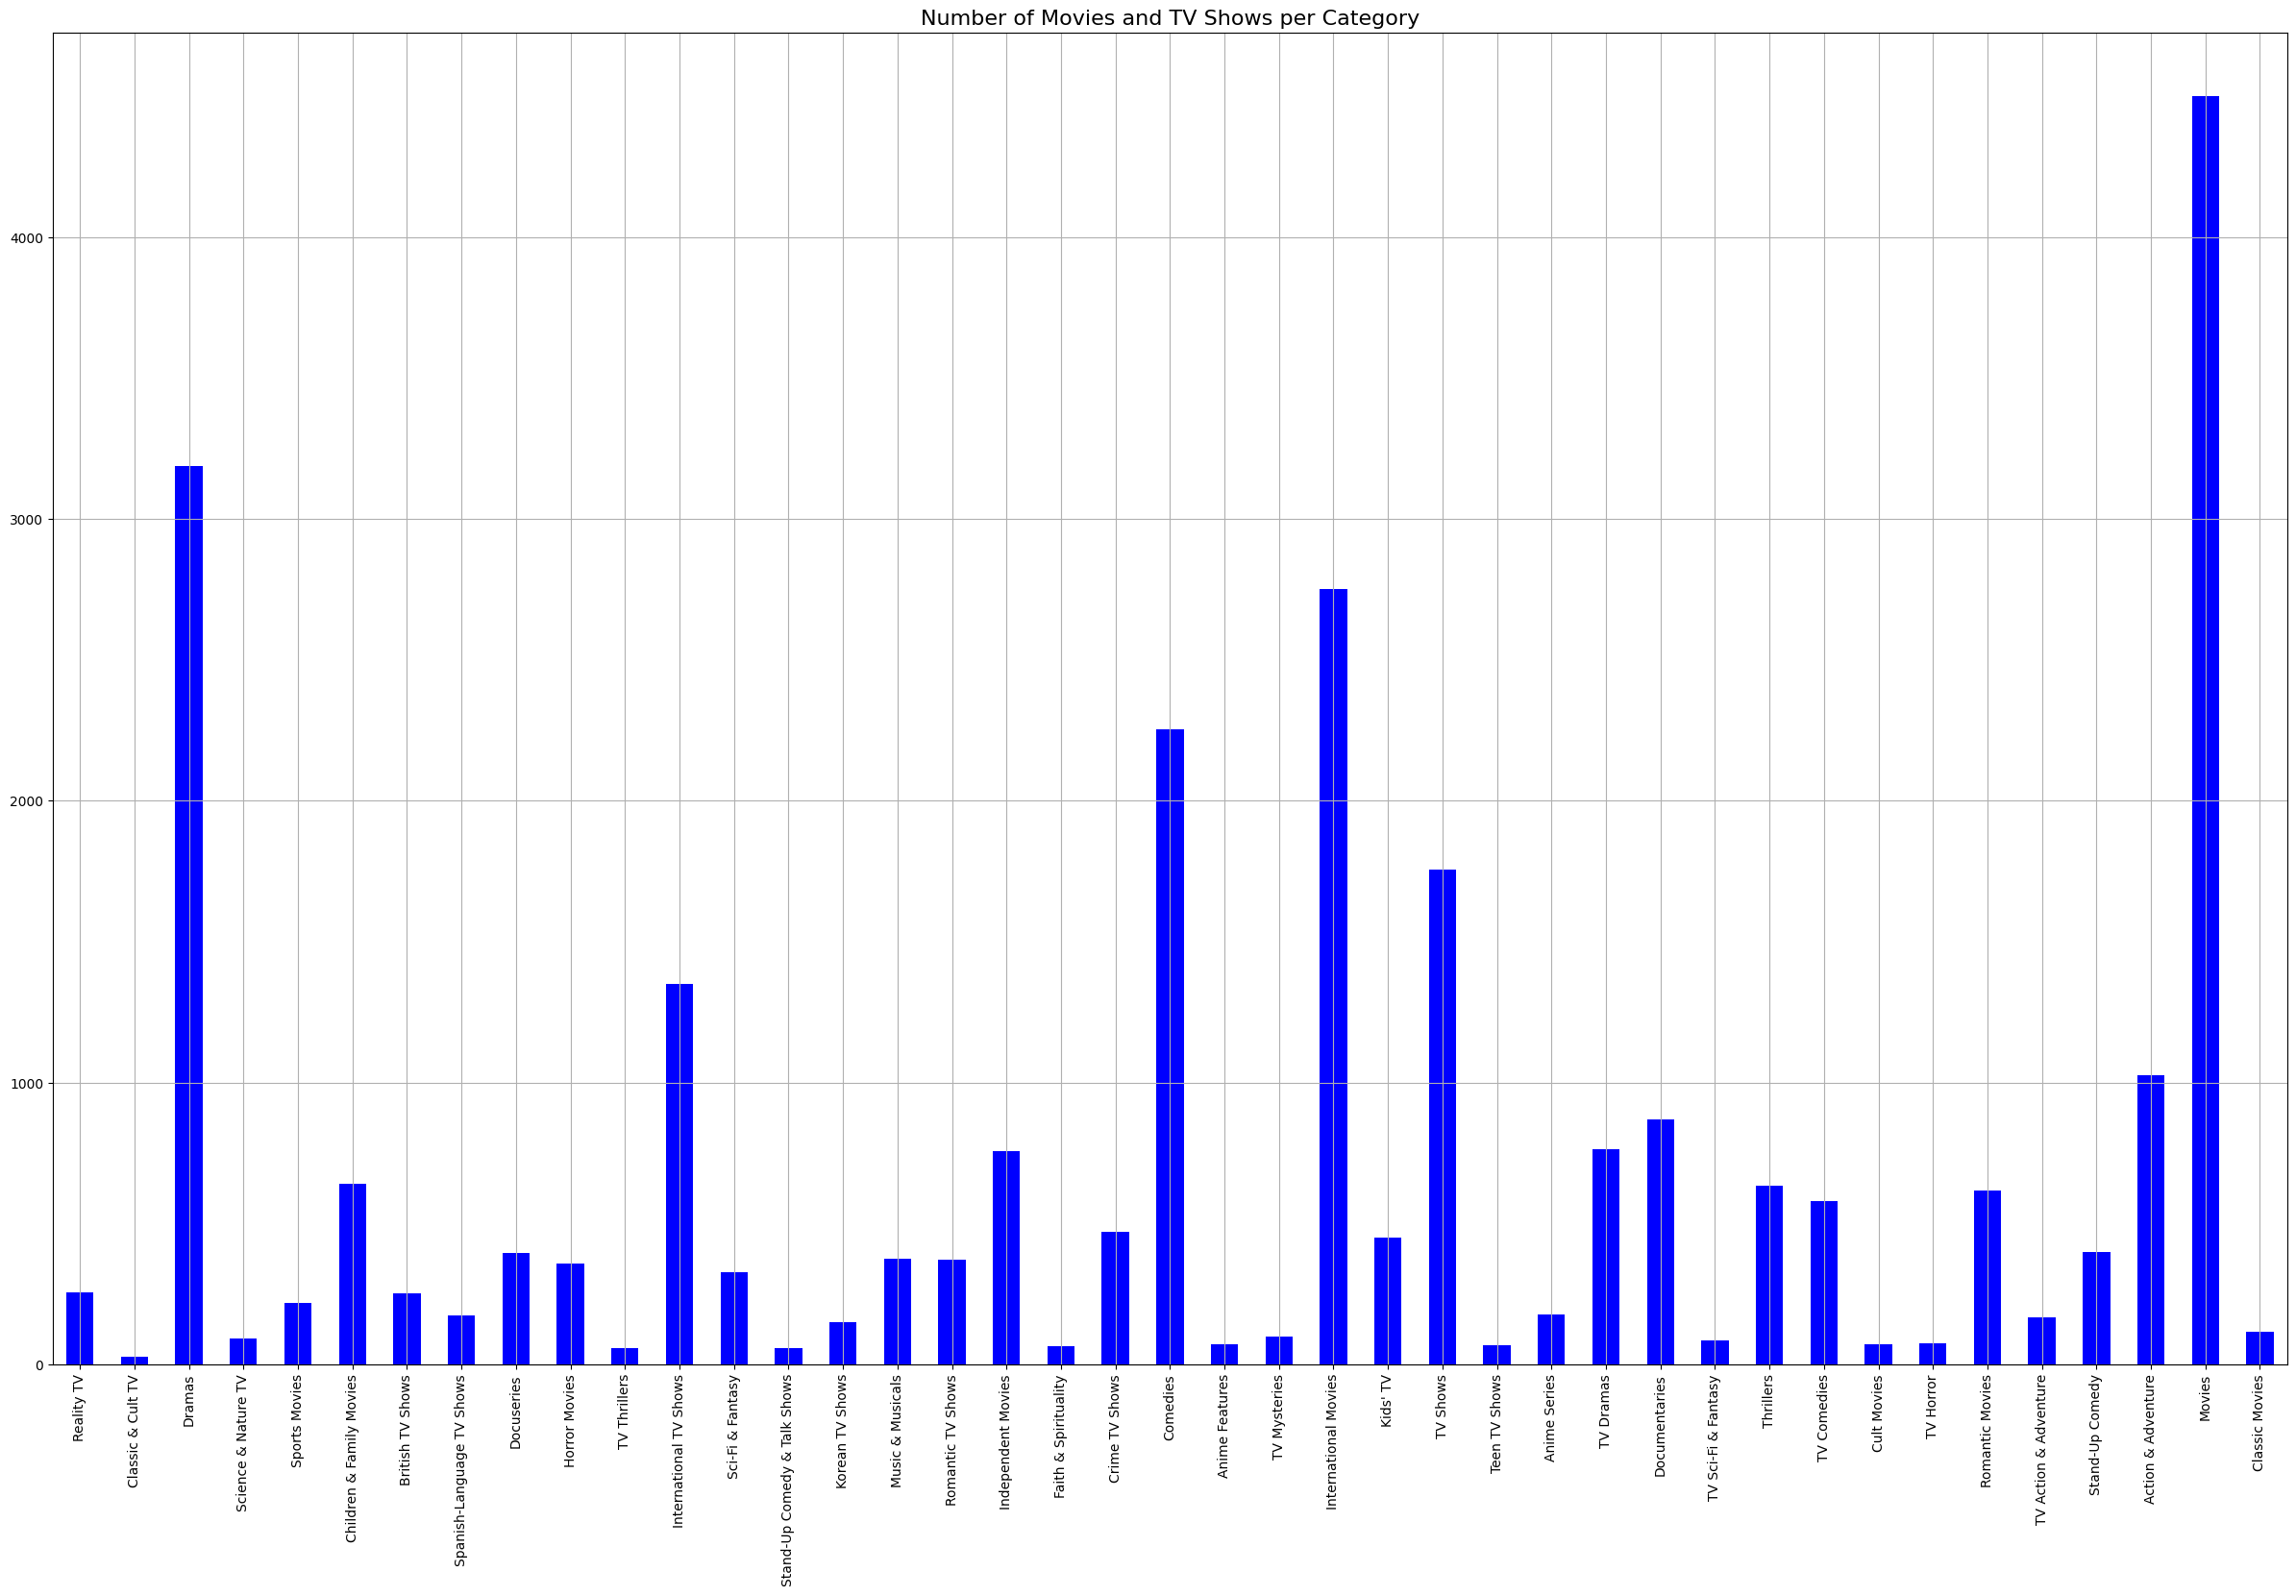

In [ ]:
categoryCounts.plot(kind="bar", figsize=(30,18), color="b")
plt.title("Number of Movies and TV Shows per Category", fontsize=16)
plt.grid(True)

In [ ]:
countrySet = set()

for country in data["country"]:
    countries = country.split(", ")
    countrySet.update(countries)

countrySet

{'',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bermuda',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cambodia,',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'East Germany',
 'Ecuador',
 'Egypt',
 'Ethiopia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malawi',
 'Malaysia',
 'Malta',
 'Mauritius',
 'Mexico',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'N

In [ ]:
for country in countrySet:

    data[country] = data["country"].str.contains(country, na=False).astype(int)

data

C:\Users\Panda\AppData\Local\Temp\ipykernel_28476\3367918515.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[country] = data["country"].str.contains(country, na=False).astype(int)
C:\Users\Panda\AppData\Local\Temp\ipykernel_28476\3367918515.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[country] = data["country"].str.contains(country, na=False).astype(int)
C:\Users\Panda\AppData\Local\Temp\ipykernel_28476\3367918515.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Sweden,Thailand,Namibia,Georgia,No Country,Hong Kong,Nicaragua,Paraguay,Nepal,Philippines
0,s1,movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,...,0,0,0,0,0,0,0,0,0,0
1,s2,series,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,0,0,0,0,0,0,0,0,0,0
2,s3,series,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Country,2021-09-24,2021,TV-MA,1 Season,...,0,0,0,0,1,0,0,0,0,0
3,s4,series,Jailbirds New Orleans,No Director,No Cast,No Country,2021-09-24,2021,TV-MA,1 Season,...,0,0,0,0,1,0,0,0,0,0
4,s5,series,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,0,0,0,0,0,0,0,0,0,0
8803,s8804,series,Zombie Dumb,No Director,No Cast,No Country,2019-07-01,2018,TV-Y7,2 Seasons,...,0,0,0,0,1,0,0,0,0,0
8804,s8805,movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,0,0,0,0,0,0,0,0,0,0
8805,s8806,movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.drop(columns="", inplace=True)

In [ ]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Sweden,Thailand,Namibia,Georgia,No Country,Hong Kong,Nicaragua,Paraguay,Nepal,Philippines
0,s1,movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,...,0,0,0,0,0,0,0,0,0,0
1,s2,series,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,0,0,0,0,0,0,0,0,0,0
2,s3,series,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Country,2021-09-24,2021,TV-MA,1 Season,...,0,0,0,0,1,0,0,0,0,0
3,s4,series,Jailbirds New Orleans,No Director,No Cast,No Country,2021-09-24,2021,TV-MA,1 Season,...,0,0,0,0,1,0,0,0,0,0
4,s5,series,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,0,0,0,0,0,0,0,0,0,0
8803,s8804,series,Zombie Dumb,No Director,No Cast,No Country,2019-07-01,2018,TV-Y7,2 Seasons,...,0,0,0,0,1,0,0,0,0,0
8804,s8805,movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,0,0,0,0,0,0,0,0,0,0
8805,s8806,movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
type(data.columns)

pandas.core.indexes.base.Index

In [ ]:
columns = [x for x in data.columns]
columns.index("Algeria")

56

In [ ]:
countryCounts = pd.Series()
for country in data.columns[56:]:
    countryCounts[country] = data[country].sum()
countryCounts


Algeria           3
India          1046
Japan           318
Cameroon          1
New Zealand      33
               ... 
Hong Kong       105
Nicaragua         1
Paraguay          1
Nepal             2
Philippines      83
Length: 127, dtype: int64

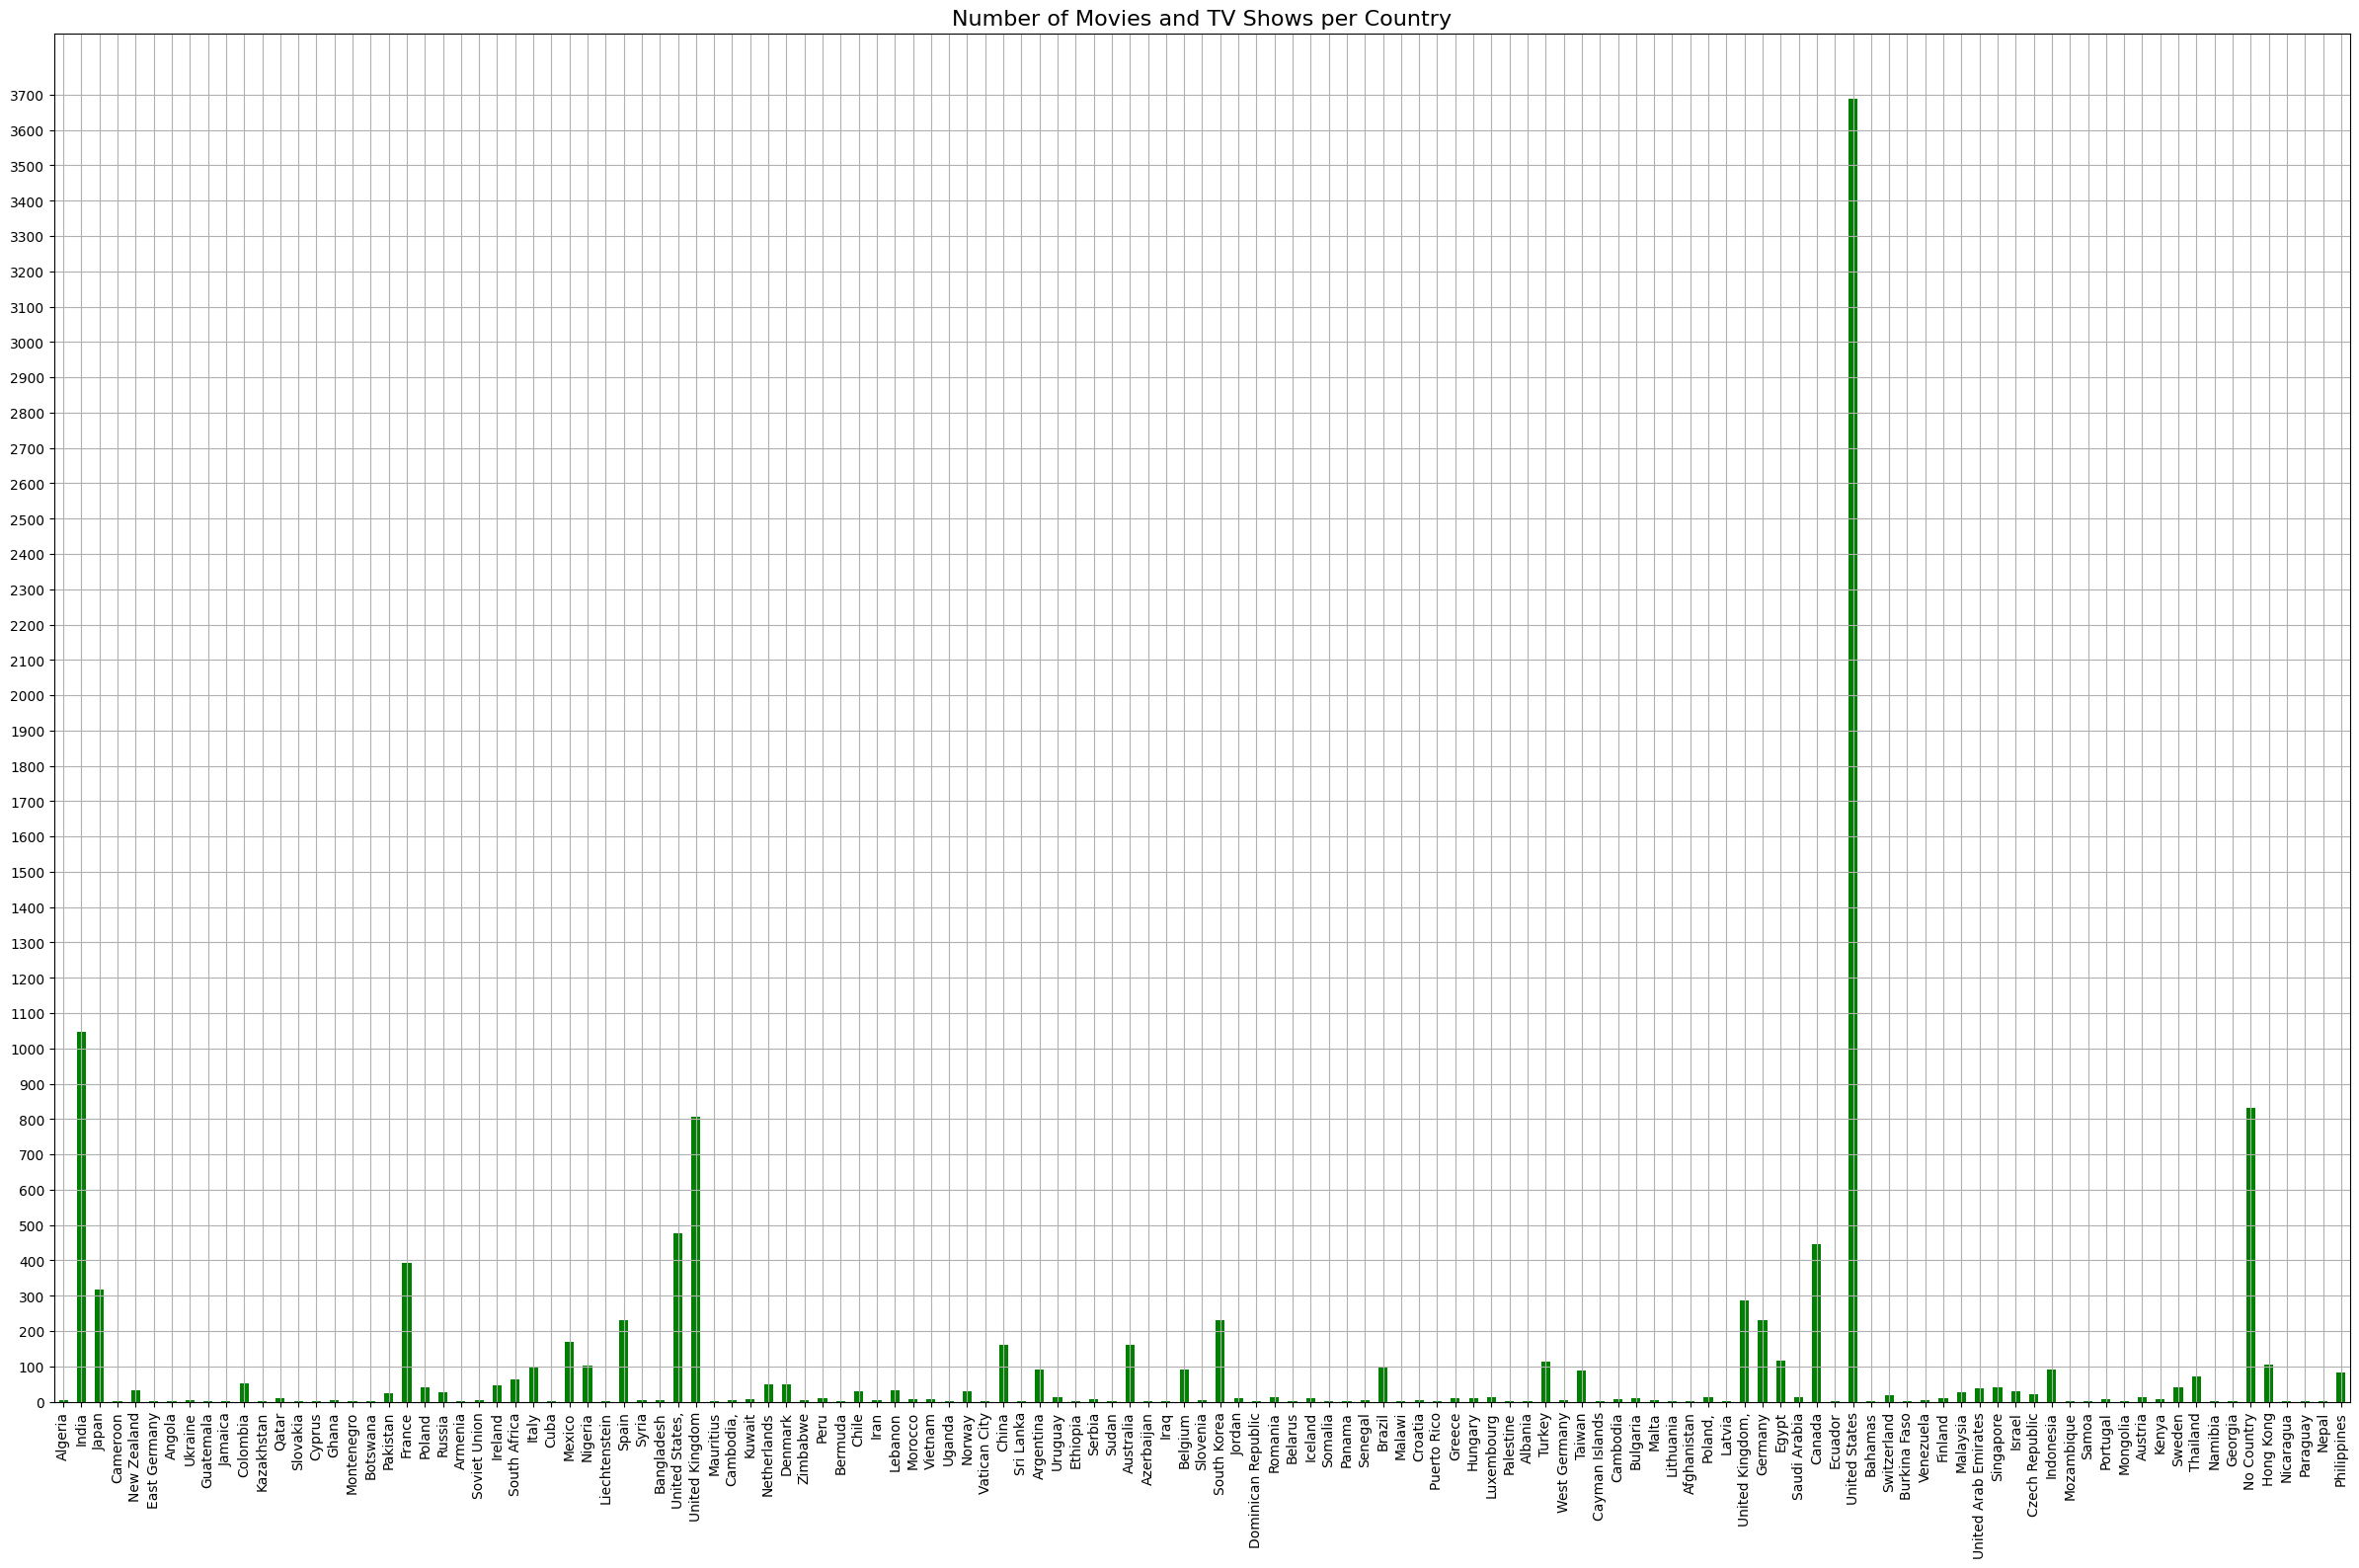

In [ ]:
countryCounts.plot(kind="bar", figsize=(30,18), color="g")
plt.title("Number of Movies and TV Shows per Country", fontsize=16)
plt.yticks(np.arange(0, 3800, 100))
plt.grid(True)

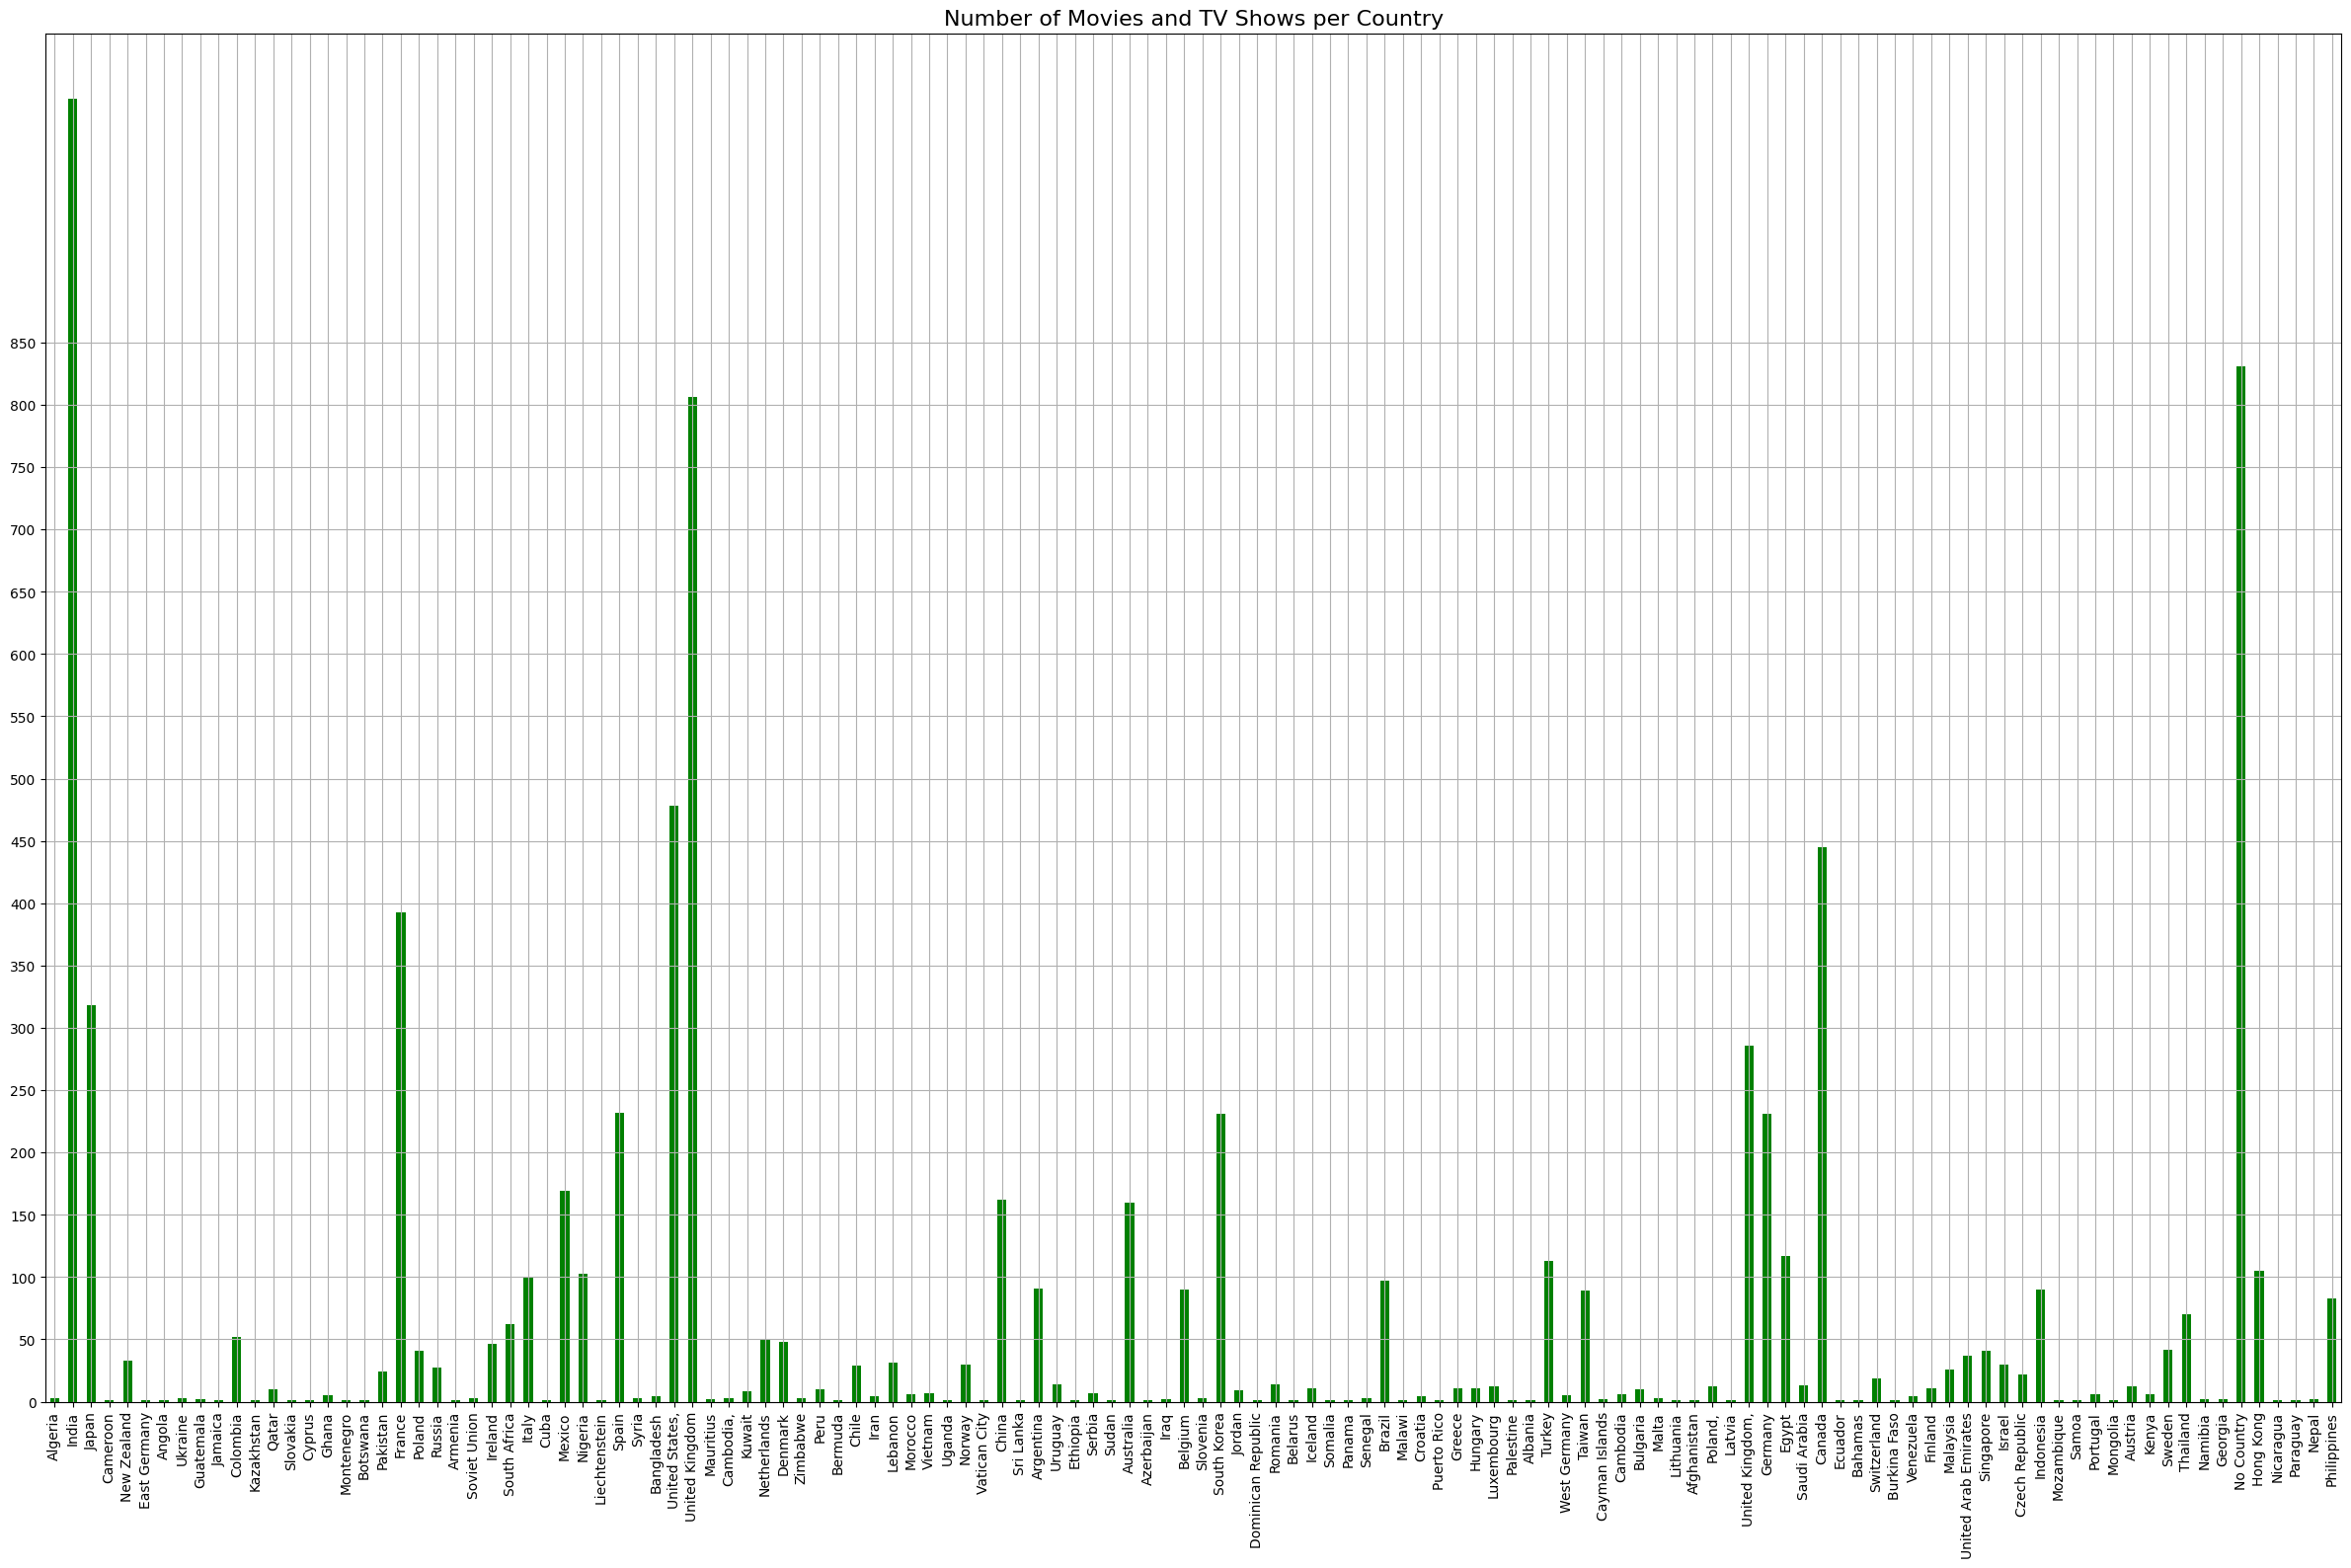

In [ ]:
countryCounts.drop(index="United States").plot(kind="bar", figsize=(30,18), color="g")
plt.title("Number of Movies and TV Shows per Country", fontsize=16)
plt.yticks(np.arange(0, 900, 50))
plt.grid(True)

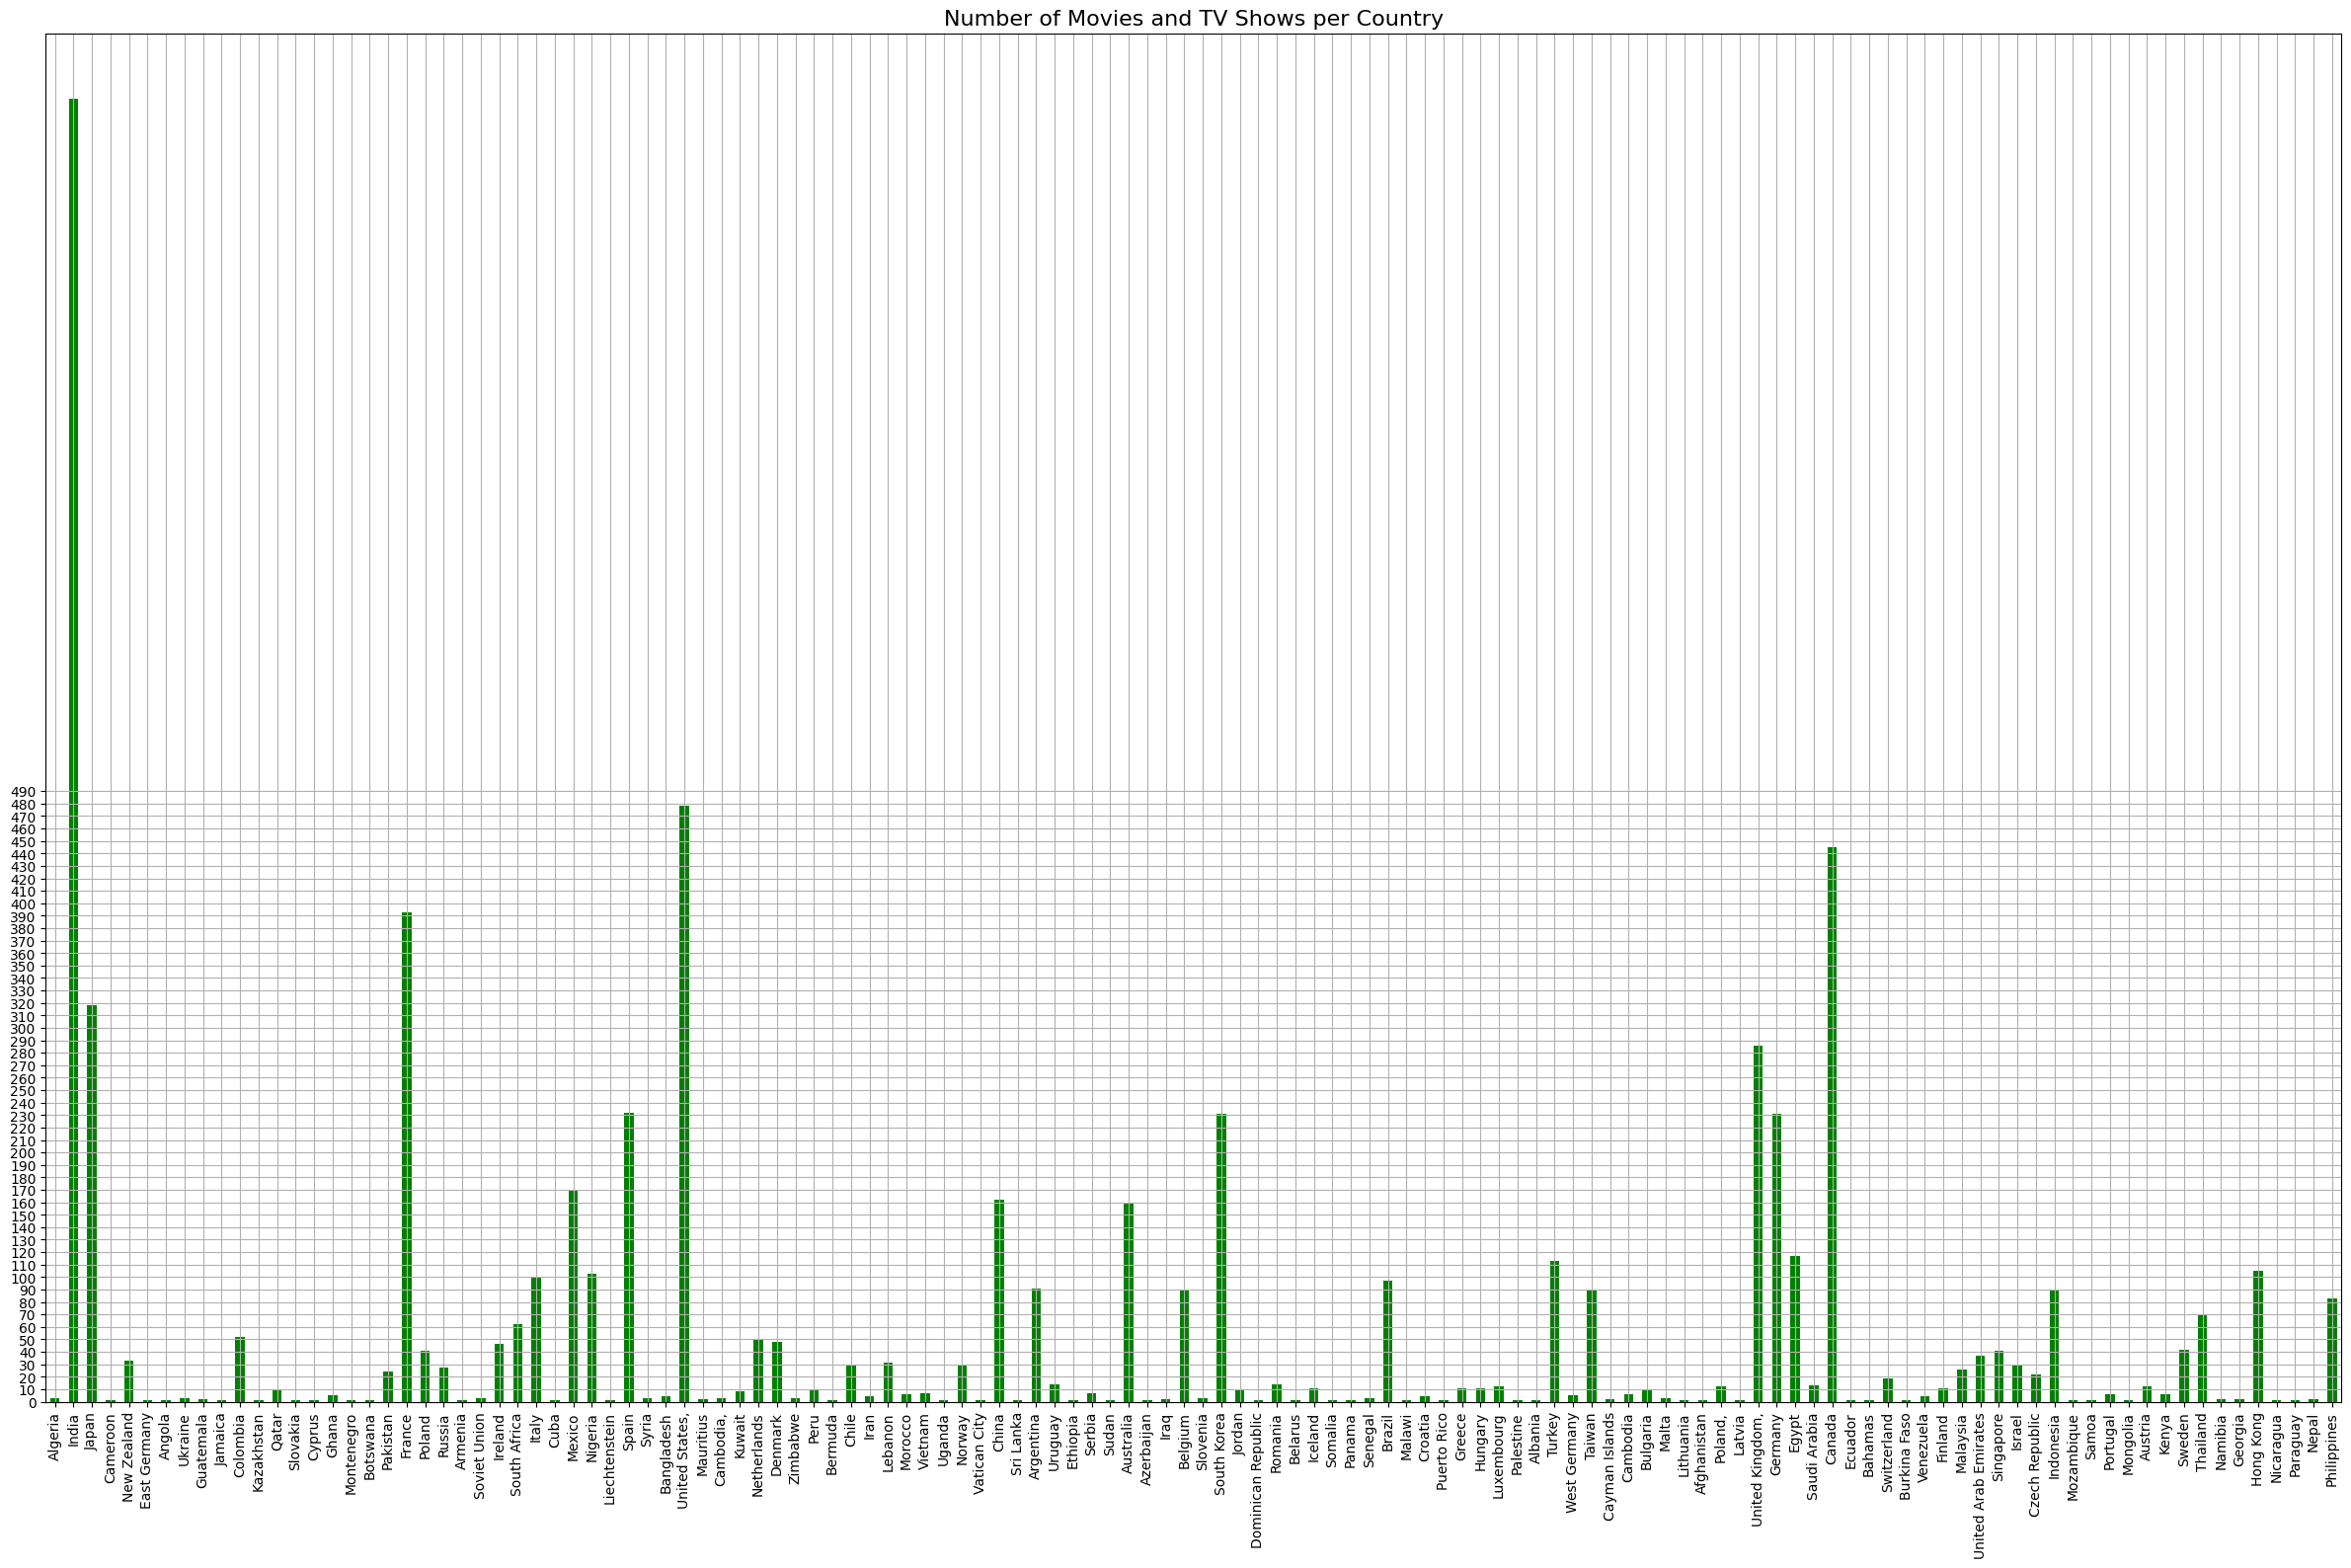

In [ ]:
countryCounts.drop(index=["No Country", "United States", "United Kingdom"]).plot(kind="bar", figsize=(30,18), color="g")
plt.title("Number of Movies and TV Shows per Country", fontsize=16)
plt.yticks(np.arange(0, 500, 10))
plt.grid(True)

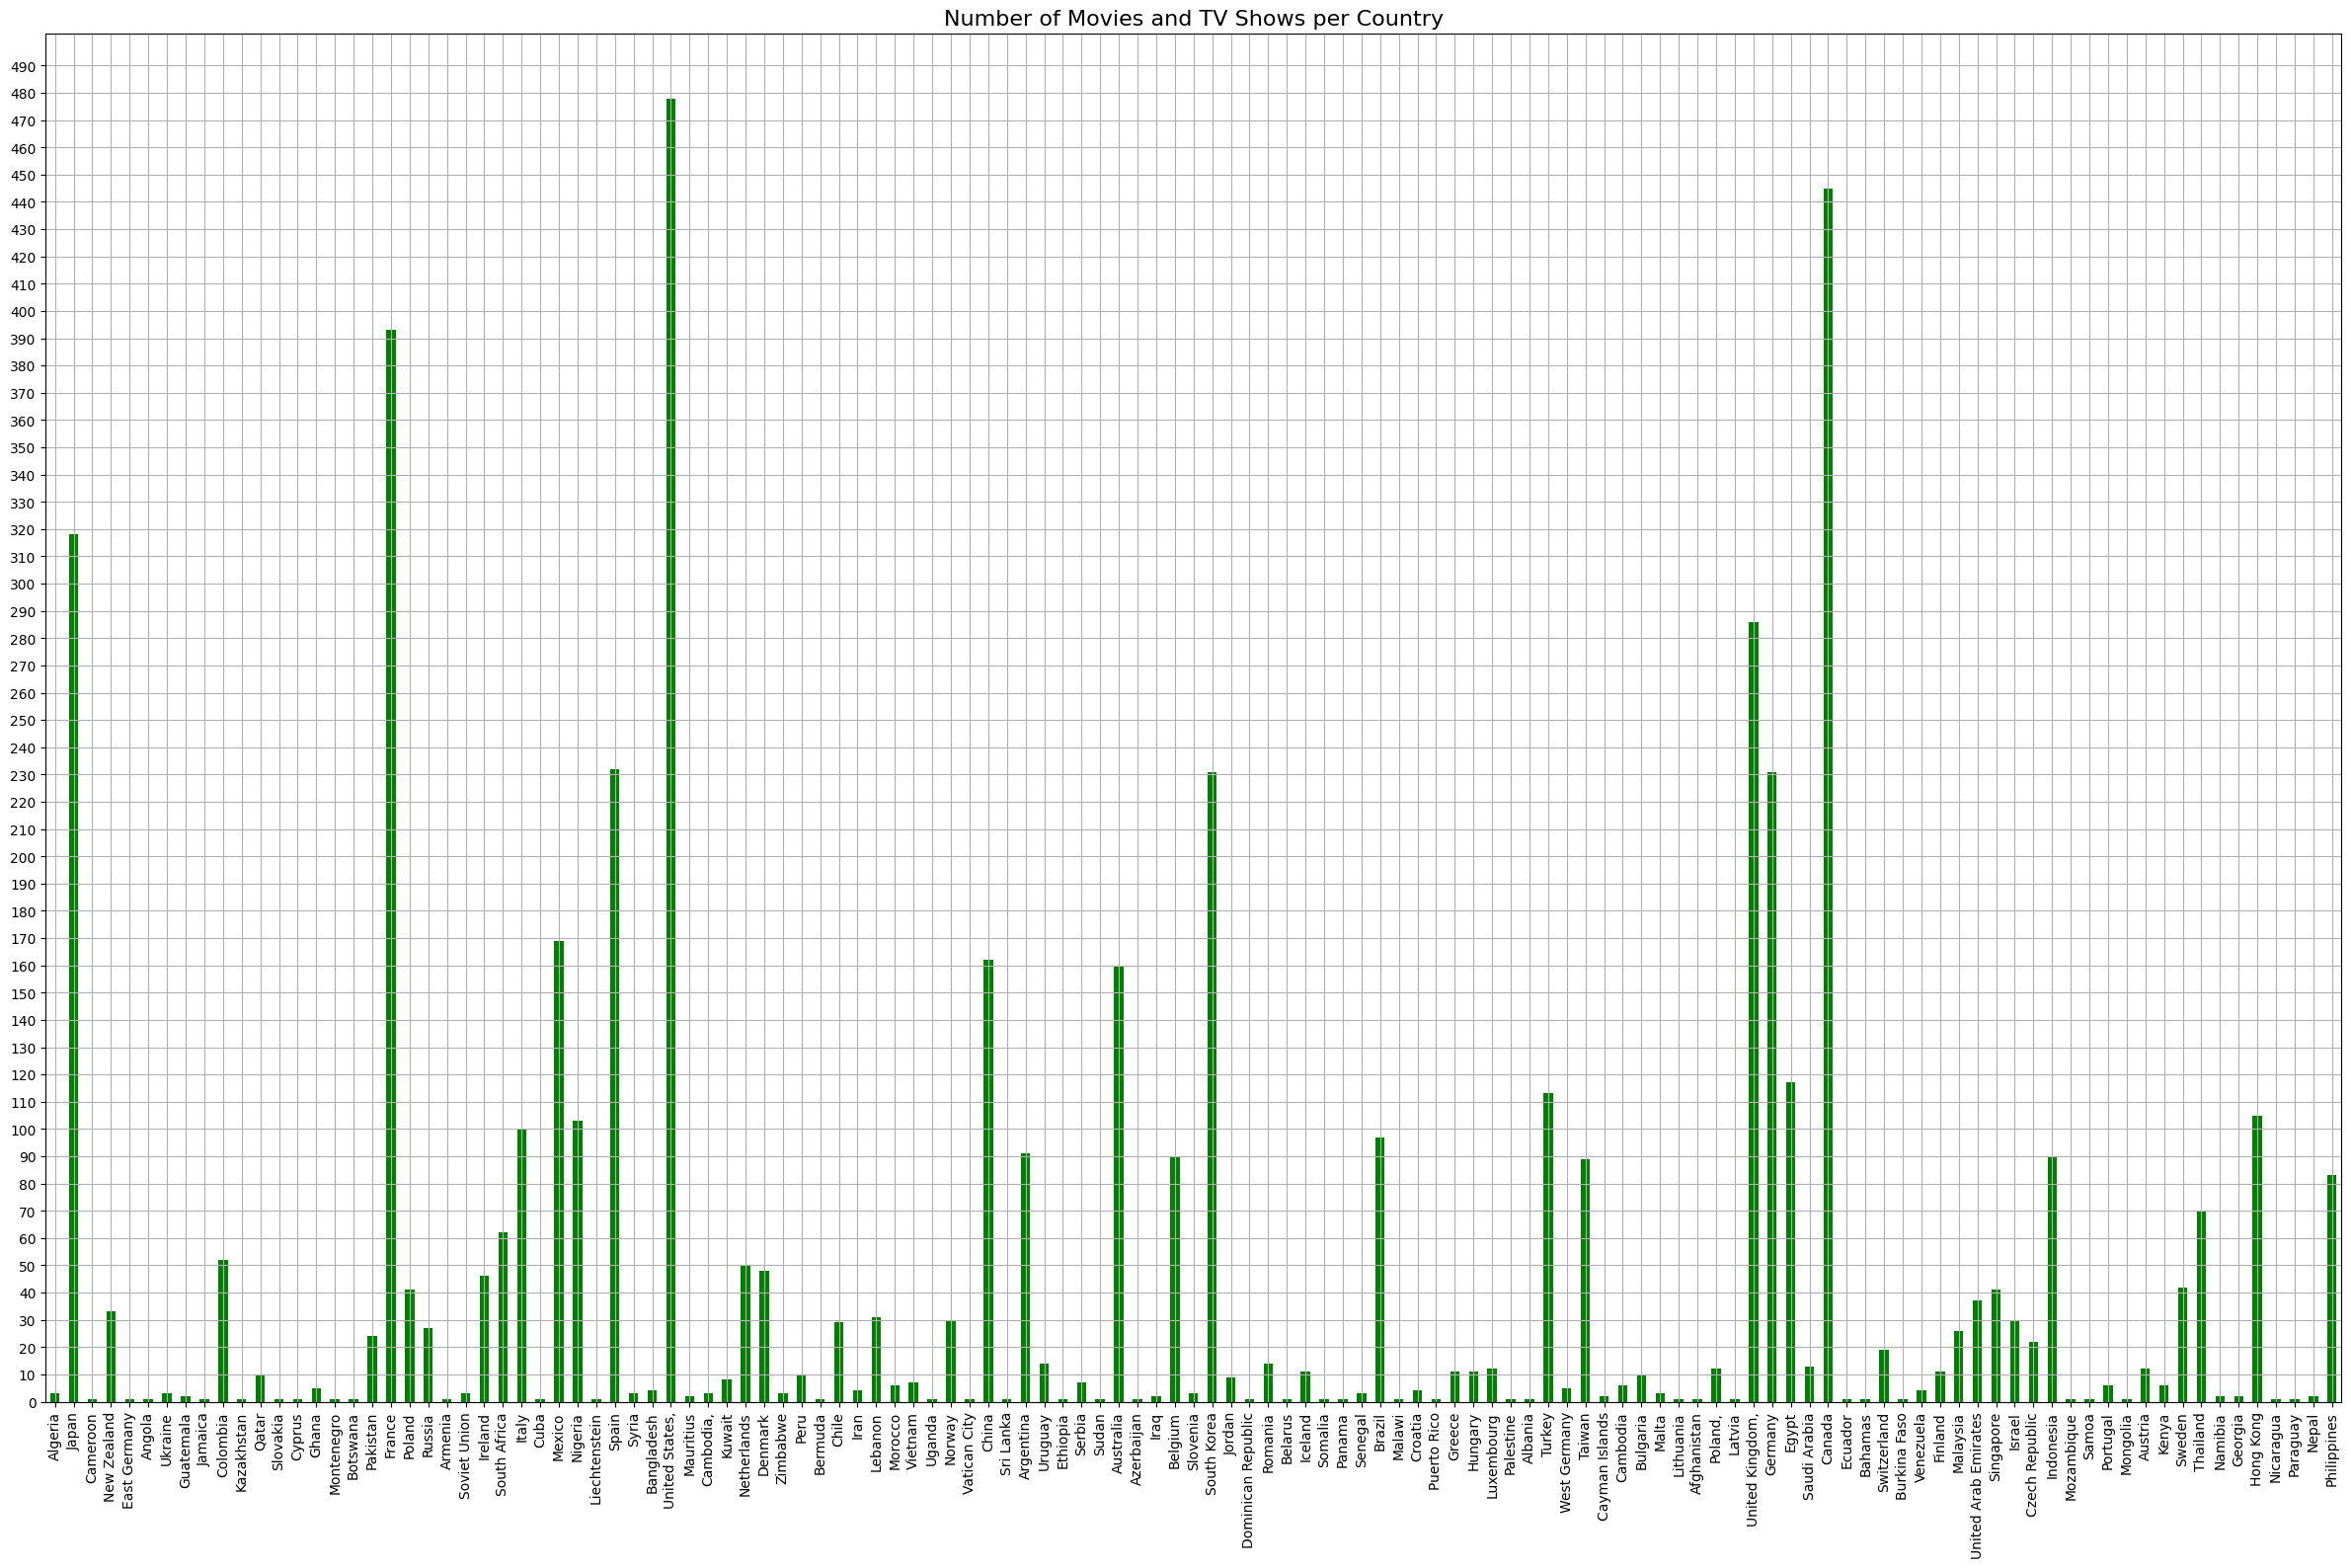

In [ ]:
countryCounts.drop(index=["No Country", "United States", "United Kingdom", "India"]).plot(kind="bar", figsize=(30,18), color="g")
plt.title("Number of Movies and TV Shows per Country", fontsize=16)
plt.yticks(np.arange(0, 500, 10))
plt.grid(True)

In [ ]:
data.dtypes

show_id        object
type           object
title          object
director       object
cast           object
                ...  
Hong Kong       int32
Nicaragua       int32
Paraguay        int32
Nepal           int32
Philippines     int32
Length: 183, dtype: object

In [ ]:
data["release_year"].unique

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [162]:
yearCounts = pd.Series()
for year in data["release_year"].unique():
    count = 0
    for x in data["release_year"]:
        if x == year:
            count += 1
    yearCounts[year] = count

([<matplotlib.axis.XTick at 0x1caa40524b0>,
 [Text(1920, 0, '1920'),
  Text(1925, 0, '1925'),
  Text(1930, 0, '1930'),
  Text(1935, 0, '1935'),
  Text(1940, 0, '1940'),
  Text(1945, 0, '1945'),
  Text(1950, 0, '1950'),
  Text(1955, 0, '1955'),
  Text(1960, 0, '1960'),
  Text(1965, 0, '1965'),
  Text(1970, 0, '1970'),
  Text(1975, 0, '1975'),
  Text(1980, 0, '1980'),
  Text(1985, 0, '1985'),
  Text(1990, 0, '1990'),
  Text(1995, 0, '1995'),
  Text(2000, 0, '2000'),
  Text(2005, 0, '2005'),
  Text(2010, 0, '2010'),
  Text(2015, 0, '2015'),
  Text(2020, 0, '2020')])

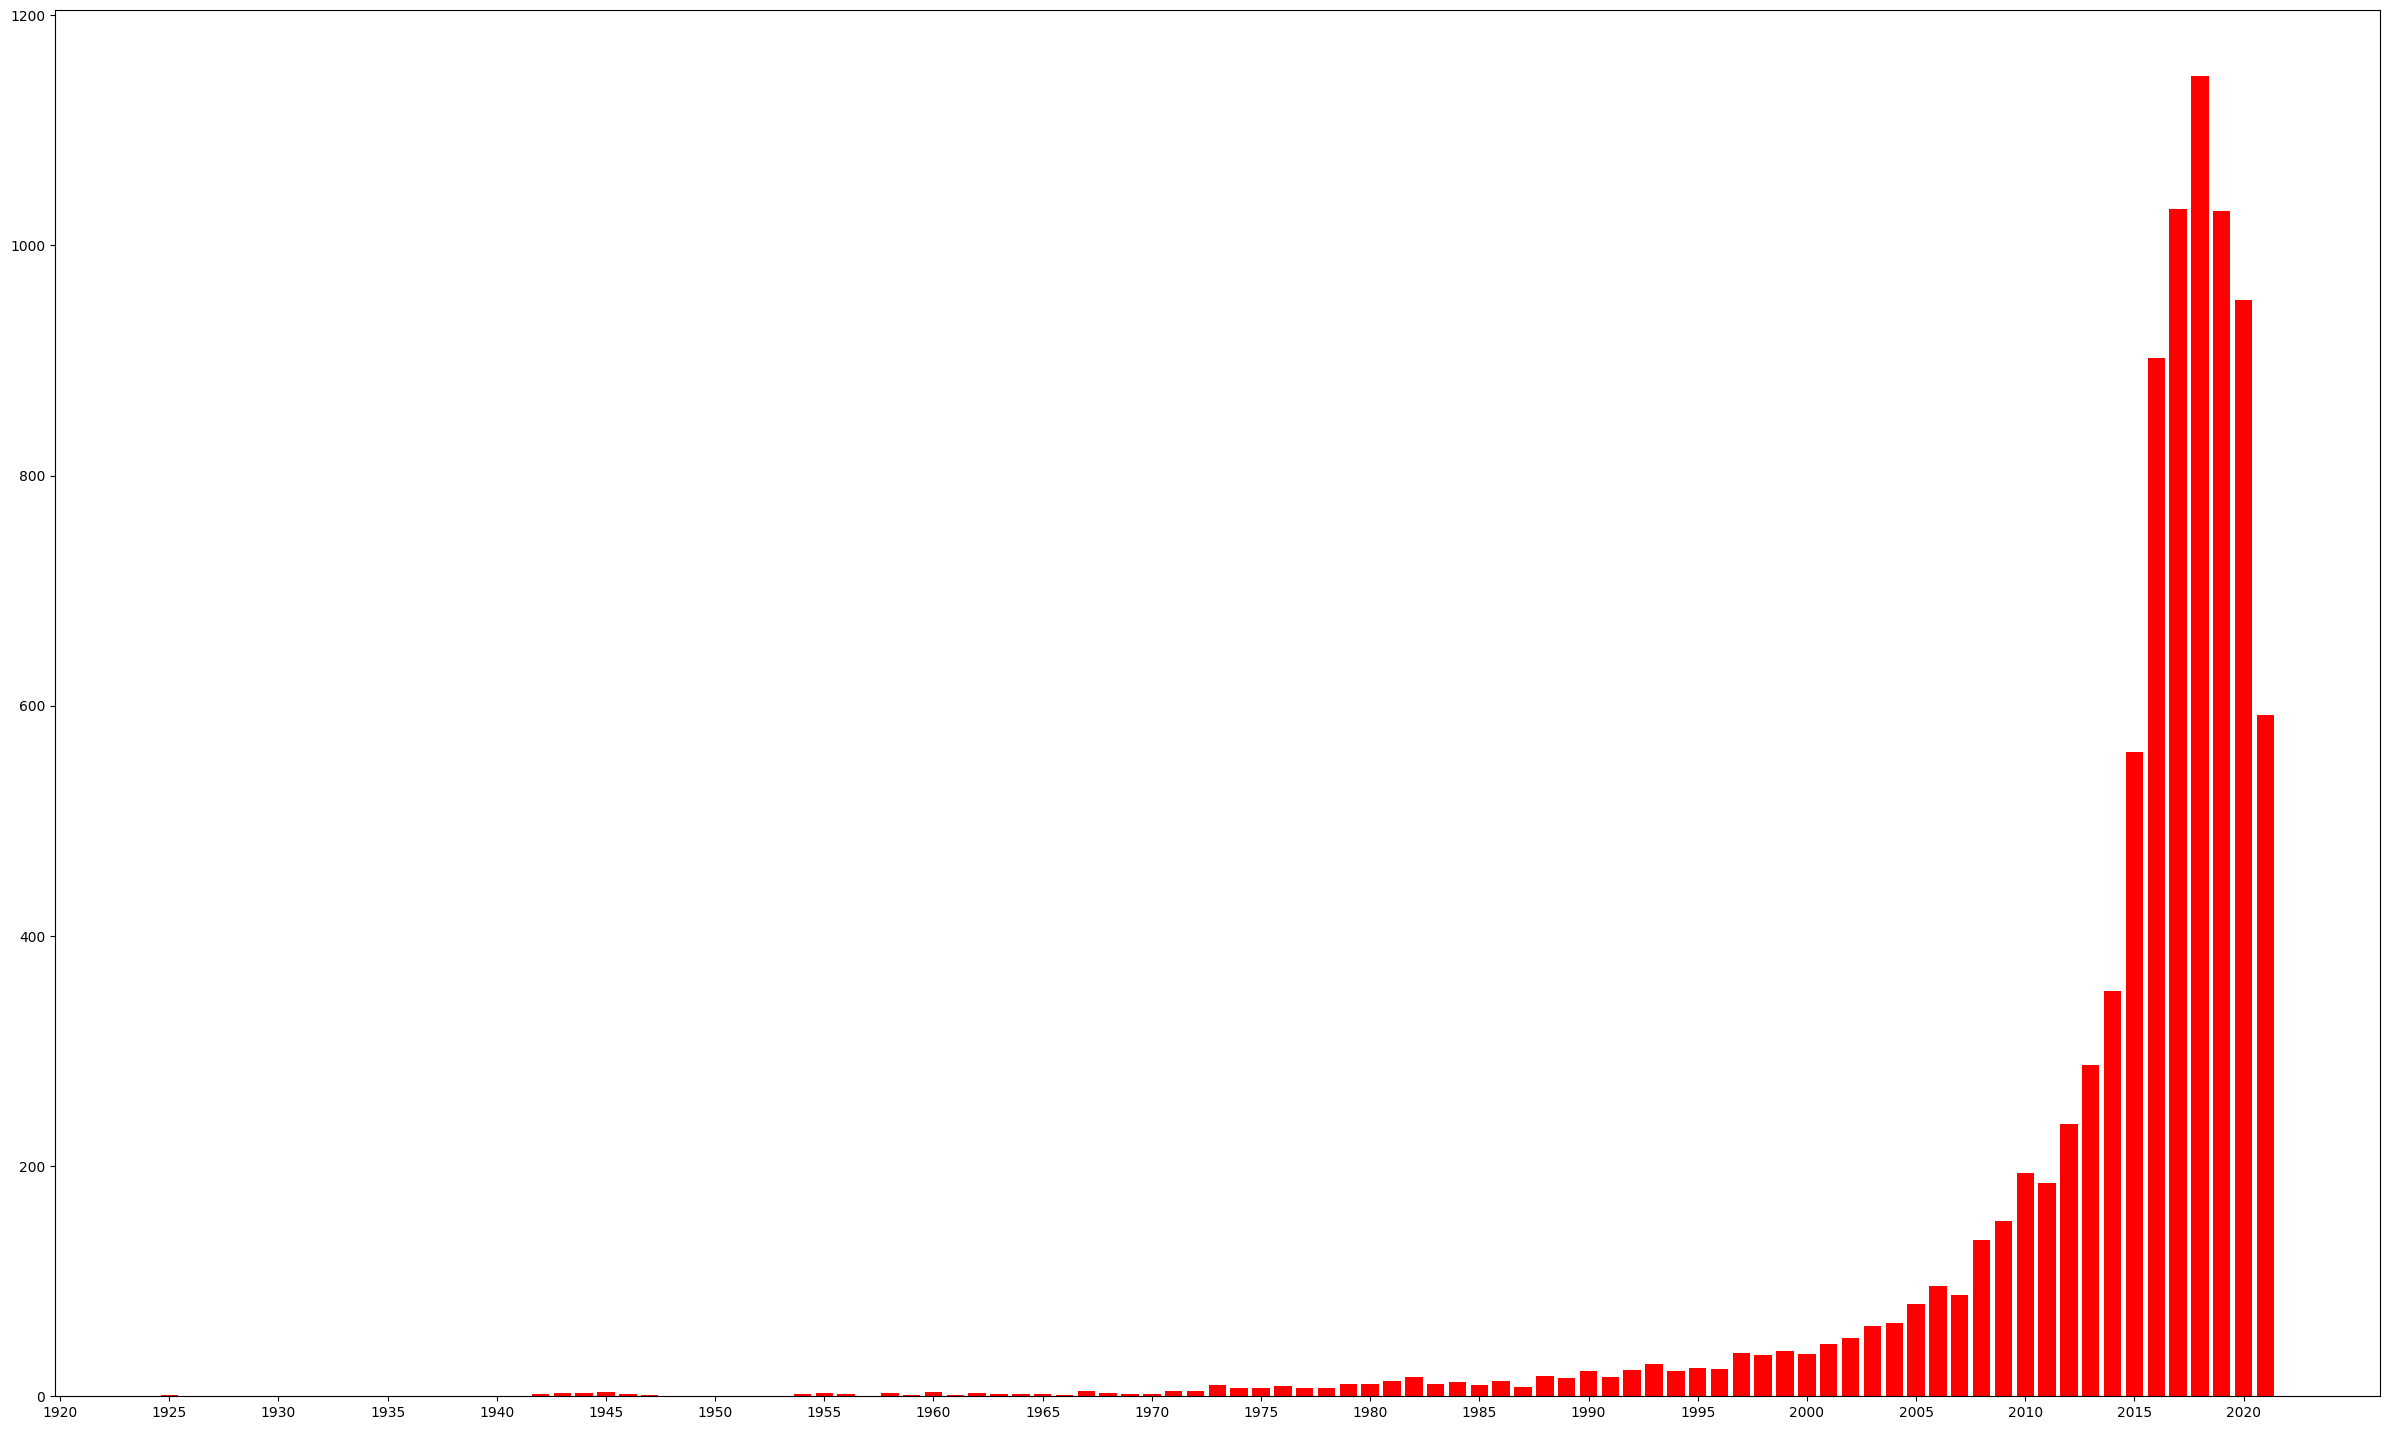

In [166]:
figure = plt.figure(figsize=(30,18))
plt.bar(data["release_year"].unique(), yearCounts, color="r")
plt.xticks(np.arange(1920, 2025, 5))